In [35]:
import pandas as pd
import numpy as np

In [36]:
path = './ptb_dataset/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/ptbxl_database.csv'

# load data
df = pd.read_csv(path)

In [37]:
df

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21832,21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,...,True,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr
21833,21834,20703.0,93.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,...,True,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr
21834,21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,...,True,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr
21835,21836,8873.0,64.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-09 18:21:49,...,True,NaN,NaN,NaN,NaN,SVES,NaN,8,records100/21000/21836_lr,records500/21000/21836_hr


In [38]:
# check null values
df.isnull().sum()

ecg_id                              0
patient_id                          0
age                                89
sex                                 0
height                          14854
weight                          12408
nurse                            1509
site                               18
device                              0
recording_date                      0
report                              0
scp_codes                           0
heart_axis                       8505
infarction_stadium1             16211
infarction_stadium2             21734
validated_by                     9411
second_opinion                      0
initial_autogenerated_report        0
validated_by_human                  0
baseline_drift                  20230
static_noise                    18575
burst_noise                     21224
electrodes_problems             21807
extra_beats                     19883
pacemaker                       21544
strat_fold                          0
filename_lr 

In [39]:
# age statistic
df.age.describe()

count    21748.000000
mean        59.836307
std         16.953125
min          2.000000
25%         50.000000
50%         62.000000
75%         72.000000
max         95.000000
Name: age, dtype: float64

<AxesSubplot:ylabel='Frequency'>

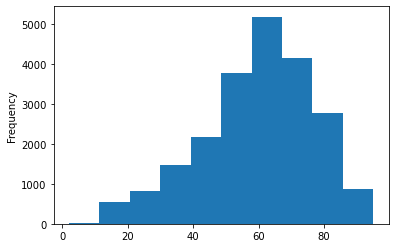

In [40]:
# plot age distribution
df.age.plot(kind='hist')

0    11379
1    10458
Name: sex, dtype: int64


<AxesSubplot:>

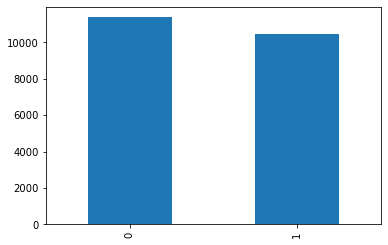

In [41]:
# number of gender number of gender 
print(df.sex.value_counts())

# bar plot
df.sex.value_counts().plot(kind='bar')

In [42]:
# nurse
df.nurse.value_counts()

0.0     8295
1.0     5709
5.0      648
3.0      642
2.0      639
7.0      639
4.0      635
6.0      631
8.0      626
10.0     626
11.0     620
9.0      618
Name: nurse, dtype: int64

In [43]:
# scp_codes
df.scp_codes.value_counts()

{'NORM': 100.0, 'SR': 0.0}                                                        6155
{'NORM': 80.0, 'SR': 0.0}                                                          722
{'NDT': 100.0, 'SR': 0.0}                                                          635
{'LAFB': 100.0, 'SR': 0.0}                                                         277
{'PACE': 100.0}                                                                    274
                                                                                  ... 
{'LVH': 50.0, 'ISC_': 100.0, 'STD_': 0.0, 'SR': 0.0}                                 1
{'NST_': 100.0, 'LVH': 50.0, 'LPR': 0.0, 'VCLVH': 0.0, 'LOWT': 0.0, 'SR': 0.0}       1
{'LVH': 35.0, 'LAO/LAE': 50.0, 'VCLVH': 0.0, 'SR': 0.0}                              1
{'IMI': 100.0, 'IVCD': 100.0, 'LVH': 100.0, 'ISC_': 100.0}                           1
{'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'STACH': 0.0}                             1
Name: scp_codes, Length: 5466, dtype: int64

In [44]:
f'Total number of patients are {len(df.patient_id.unique())}'

'Total number of patients are 18885'

In [45]:
def object_to_dict(row):
    scp =dict(scpcodes.split(':') for scpcodes in row.replace("'",'').replace('{','').replace('}', '').split(','))
    scp ={key.strip():val.strip() for key, val in scp.items()}
    scp = {key:float(val) for key, val in scp.items()}
    return scp


def keep_only_highest_scp_codes(dic):
    fin_max = max(dic, key=dic.get)
    return {key:val for key, val in dic.items() if val==dic[fin_max]}

In [46]:
# convert scp code into dictionary form
df.scp_codes = df.scp_codes.apply(object_to_dict)

In [47]:
df.shape

(21837, 28)

In [48]:
# remove scp code whose likey hood is 0
df.scp_codes = df.scp_codes.apply(lambda x : {key:val for key, val in x.items() if val>1})

In [49]:
df.shape

(21837, 28)

In [50]:
# df[df['scp_codes'].apply(lambda x: len(x))==3]

In [51]:

# If multiple scp code exists, keep only those scp code which likely is highest
# df.scp_codes = df.scp_codes.apply(keep_only_highest_scp_codes)

In [52]:
# df[df['scp_codes'].apply(lambda x: len(x))==2]

In [53]:
df['scp_codes']

0                     {'NORM': 100.0}
1                      {'NORM': 80.0}
2                     {'NORM': 100.0}
3                     {'NORM': 100.0}
4                     {'NORM': 100.0}
                     ...             
21832    {'NDT': 100.0, 'PVC': 100.0}
21833                 {'NORM': 100.0}
21834                 {'ISCAS': 50.0}
21835                 {'NORM': 100.0}
21836                 {'NORM': 100.0}
Name: scp_codes, Length: 21837, dtype: object

In [13]:
# calculate the occurance of each scp code
scp_code_occurance = {}
for row in df.scp_codes:
    for key, val in row.items():
        if key in scp_code_occurance:
            scp_code_occurance[key] +=1
        else:
            scp_code_occurance[key] = 1
print(scp_code_occurance)

{'NORM': 9148, 'IMI': 1790, 'AFLT': 56, 'NDT': 1826, 'NST_': 559, 'DIG': 138, 'LVH': 1527, 'LPFB': 174, 'LNGQT': 116, 'LAFB': 1616, 'IRBBB': 1110, 'IVCD': 787, 'ASMI': 1773, '1AVB': 789, 'ISCAL': 613, 'ISC_': 1201, 'PACE': 289, 'ISCLA': 126, 'ISCIL': 165, 'ILMI': 387, 'PVC': 1030, 'CRBBB': 538, 'CLBBB': 535, 'ALMI': 229, 'ISCAS': 160, 'RAO/RAE': 83, 'RVH': 58, 'ANEUR': 13, 'ILBBB': 76, 'ISCIN': 205, 'AMI': 201, 'EL': 41, 'AFIB': 48, 'INJAS': 207, 'INJAL': 138, 'IPMI': 31, 'WPW': 79, 'LAO/LAE': 349, 'ISCAN': 40, 'SEHYP': 19, 'LMI': 97, 'INJLA': 17, 'IPLMI': 44, '3AVB': 16, 'PAC': 37, 'INJIL': 15, '2AVB': 14, 'PSVT': 24, 'PMI': 10, 'INJIN': 17, 'STACH': 3, 'BIGU': 24}


# convert the scp codes into diagonist super class

In [54]:
# load the scp statement data
scp_filepath = './ptb_dataset/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/scp_statements.csv'
scp = pd.read_csv(scp_filepath)
scp

,Unnamed: 0,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
0,NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
1,NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
2,DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
3,LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
4,NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,BIGU,"bigeminal pattern (unknown origin, SV or Ventr...",NaN,NaN,1.0,NaN,NaN,Statements related to ectopic rhythm abnormali...,"bigeminal pattern (unknown origin, SV or Ventr...",NaN,NaN,NaN,NaN
67,AFLT,atrial flutter,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,atrial flutter,51.0,MDC_ECG_RHY_ATR_FLUT,NaN,NaN
68,SVTAC,supraventricular tachycardia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,supraventricular tachycardia,55.0,MDC_ECG_RHY_SV_TACHY,NaN,D3-31290
69,PSVT,paroxysmal supraventricular tachycardia,NaN,NaN,1.0,NaN,NaN,Statements related to impulse formation (abnor...,paroxysmal supraventricular tachycardia,NaN,MDC_ECG_RHY_SV_TACHY_PAROX,NaN,NaN


In [55]:
# null values entries
scp.isnull().sum()

Unnamed: 0                        0
description                       0
diagnostic                       27
form                             52
rhythm                           59
diagnostic_class                 27
diagnostic_subclass              27
Statement Category                0
SCP-ECG Statement Description     0
AHA code                         34
aECG REFID                       48
CDISC Code                       58
DICOM Code                       58
dtype: int64

In [56]:
# out of 71 scp codes, 27 scp codes have null values in diagonist, so keep entries whose diagnoist class is not null
dia_scp = scp[~scp.diagnostic.isnull()]
dia_scp

,Unnamed: 0,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
0,NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
1,NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
2,DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
3,LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
4,NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7
5,IMI,inferior myocardial infarction,1.0,NaN,NaN,MI,IMI,Myocardial Infarction,inferior myocardial infarction,161.0,NaN,NaN,NaN
6,ASMI,anteroseptal myocardial infarction,1.0,NaN,NaN,MI,AMI,Myocardial Infarction,anteroseptal myocardial infarction,165.0,NaN,NaN,NaN
7,LVH,left ventricular hypertrophy,1.0,NaN,NaN,HYP,LVH,Ventricular Hypertrophy,left ventricular hypertrophy,142.0,NaN,C71076,NaN
8,LAFB,left anterior fascicular block,1.0,NaN,NaN,CD,LAFB/LPFB,Intraventricular and intra-atrial Conduction d...,left anterior fascicular block,101.0,MDC_ECG_BEAT_BLK_ANT_L_HEMI,C62267,D3-33140
9,ISC_,non-specific ischemic,1.0,NaN,NaN,STTC,ISC_,Basic roots for coding ST-T changes and abnorm...,ischemic ST-T changes,226.0,NaN,NaN,NaN


In [57]:
# now we have 44 scp codes remaining.
dia_scp.diagnostic_class.value_counts()

MI      14
STTC    13
CD      11
HYP      5
NORM     1
Name: diagnostic_class, dtype: int64

In [58]:
dia_scp['Unnamed: 0'].count()

44

In [59]:
scp_and_superclass = dia_scp[['Unnamed: 0', 'diagnostic_class']].set_index('Unnamed: 0').to_dict()['diagnostic_class']
scp_and_superclass

{'NDT': 'STTC',
 'NST_': 'STTC',
 'DIG': 'STTC',
 'LNGQT': 'STTC',
 'NORM': 'NORM',
 'IMI': 'MI',
 'ASMI': 'MI',
 'LVH': 'HYP',
 'LAFB': 'CD',
 'ISC_': 'STTC',
 'IRBBB': 'CD',
 '1AVB': 'CD',
 'IVCD': 'CD',
 'ISCAL': 'STTC',
 'CRBBB': 'CD',
 'CLBBB': 'CD',
 'ILMI': 'MI',
 'LAO/LAE': 'HYP',
 'AMI': 'MI',
 'ALMI': 'MI',
 'ISCIN': 'STTC',
 'INJAS': 'MI',
 'LMI': 'MI',
 'ISCIL': 'STTC',
 'LPFB': 'CD',
 'ISCAS': 'STTC',
 'INJAL': 'MI',
 'ISCLA': 'STTC',
 'RVH': 'HYP',
 'ANEUR': 'STTC',
 'RAO/RAE': 'HYP',
 'EL': 'STTC',
 'WPW': 'CD',
 'ILBBB': 'CD',
 'IPLMI': 'MI',
 'ISCAN': 'STTC',
 'IPMI': 'MI',
 'SEHYP': 'HYP',
 'INJIN': 'MI',
 'INJLA': 'MI',
 'PMI': 'MI',
 '3AVB': 'CD',
 'INJIL': 'MI',
 '2AVB': 'CD'}

In [60]:
def convert_into_superclass(item):
    return list(set(scp_and_superclass[key] for key in item if key in scp_and_superclass))

In [61]:
df['super_class'] = df.scp_codes.apply(convert_into_superclass)

In [62]:
df[['super_class', 'scp_codes']]

,super_class,scp_codes
0,[NORM],{'NORM': 100.0}
1,[NORM],{'NORM': 80.0}
2,[NORM],{'NORM': 100.0}
3,[NORM],{'NORM': 100.0}
4,[NORM],{'NORM': 100.0}
...,...,...
21832,[STTC],"{'NDT': 100.0, 'PVC': 100.0}"
21833,[NORM],{'NORM': 100.0}
21834,[STTC],{'ISCAS': 50.0}
21835,[NORM],{'NORM': 100.0}


In [63]:
# calculate the occurance of each scp code
scp_code_occurance = {}
for row in df.super_class:
    for key in row:
        if key in scp_code_occurance:
            scp_code_occurance[key] +=1
        else:
            scp_code_occurance[key] = 1
print(scp_code_occurance)

{'NORM': 9528, 'MI': 5486, 'STTC': 5123, 'HYP': 2655, 'CD': 4907}


In [65]:
df[df.super_class.apply(lambda x: len(x)>1)]['super_class'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[CD, MI]               1324
[STTC, HYP]             772
[STTC, MI]              586
[CD, NORM]              410
[STTC, MI, HYP]         359
[CD, HYP]               304
[STTC, CD]              250
[CD, STTC]              201
[MI, HYP]               186
[CD, STTC, HYP]         127
[CD, MI, HYP]           123
[CD, STTC, MI]          105
[CD, STTC, MI, HYP]     104
[STTC, CD, MI]           96
[STTC, CD, HYP]          80
[STTC, CD, MI, HYP]      48
[STTC, CD, NORM]          2
[CD, NORM, HYP]           2
[NORM, HYP]               2
[MI, CD, NORM, HYP]       1
Name: super_class, dtype: int64

In [25]:
df[df.super_class.apply(lambda x: len(x)==0)]

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,super_class
16,17,13619.0,56.0,0,NaN,NaN,2.0,0.0,CS-12 E,1985-01-20 14:25:25,...,NaN,", alles,",NaN,NaN,NaN,NaN,9,records100/00000/00017_lr,records500/00000/00017_hr,[]
17,18,13619.0,56.0,0,NaN,NaN,2.0,0.0,CS-12 E,1985-01-20 15:17:24,...,NaN,", alles,",NaN,NaN,NaN,NaN,9,records100/00000/00018_lr,records500/00000/00018_hr,[]
19,20,13619.0,56.0,0,NaN,NaN,2.0,0.0,CS-12 E,1985-01-23 12:55:32,...,NaN,NaN,NaN,NaN,VES,NaN,9,records100/00000/00020_lr,records500/00000/00020_hr,[]
22,23,13619.0,56.0,0,NaN,NaN,2.0,0.0,CS-12 E,1985-01-25 12:49:40,...,NaN,NaN,NaN,NaN,NaN,NaN,9,records100/00000/00023_lr,records500/00000/00023_hr,[]
33,34,13619.0,56.0,0,NaN,NaN,2.0,0.0,CS-12 E,1985-02-10 12:04:03,...,NaN,", alles,",NaN,NaN,NaN,NaN,9,records100/00000/00034_lr,records500/00000/00034_hr,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21667,21668,9090.0,40.0,1,NaN,NaN,0.0,0.0,CS100 3,2000-12-18 15:39:43,...,NaN,", I-AVR,",NaN,NaN,"VES1,alles",NaN,4,records100/21000/21668_lr,records500/21000/21668_hr,[]
21688,21689,19288.0,75.0,0,NaN,NaN,0.0,0.0,CS100 3,2001-01-02 10:15:42,...,NaN,NaN,NaN,NaN,NaN,"ja, pacemaker",5,records100/21000/21689_lr,records500/21000/21689_hr,[]
21720,21721,9285.0,39.0,1,NaN,NaN,0.0,0.0,CS100 3,2001-01-10 12:22:14,...,NaN,NaN,NaN,NaN,VES,NaN,6,records100/21000/21721_lr,records500/21000/21721_hr,[]
21777,21778,17965.0,73.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-01-28 19:00:17,...,NaN,NaN,NaN,NaN,1ES,NaN,7,records100/21000/21778_lr,records500/21000/21778_hr,[]


In [26]:
df[df.super_class.apply(lambda x: len(x)==1)]

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,super_class
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,[NORM]
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,[NORM]
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,[NORM]
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,[NORM]
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,[NORM]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21832,21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,...,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr,[STTC]
21833,21834,20703.0,93.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,...,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr,[NORM]
21834,21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,...,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr,[STTC]
21835,21836,8873.0,64.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-09 18:21:49,...,NaN,NaN,NaN,NaN,SVES,NaN,8,records100/21000/21836_lr,records500/21000/21836_hr,[NORM]


In [27]:
df_multiple_scp = df[df.super_class.apply(lambda x: len(x)>1)]

In [28]:
df_multiple_scp

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,super_class
86,87,17293.0,19.0,0,NaN,69.0,2.0,0.0,CS-12 E,1985-11-15 10:45:32,...,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,7,records100/00000/00087_lr,records500/00000/00087_hr,"[STTC, CD]"
139,140,13451.0,27.0,1,164.0,54.0,NaN,3.0,CS-12 E,1986-02-23 08:06:51,...,NaN,NaN,NaN,NaN,NaN,NaN,9,records100/00000/00140_lr,records500/00000/00140_hr,"[STTC, HYP]"
140,141,16722.0,80.0,0,NaN,NaN,NaN,3.0,AT-6 C,1986-02-23 08:18:25,...,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00141_lr,records500/00000/00141_hr,"[STTC, CD]"
161,162,9780.0,85.0,1,NaN,NaN,NaN,3.0,AT-6 C,1986-03-07 06:22:16,...,NaN,NaN,NaN,NaN,NaN,NaN,10,records100/00000/00162_lr,records500/00000/00162_hr,"[STTC, CD]"
172,173,10676.0,82.0,0,NaN,NaN,NaN,3.0,AT-6 C,1986-03-13 10:56:41,...,NaN,NaN,NaN,V6,NaN,NaN,9,records100/00000/00173_lr,records500/00000/00173_hr,"[STTC, HYP]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21780,21781,13857.0,73.0,0,NaN,NaN,0.0,0.0,CS100 3,2001-01-29 09:58:19,...,NaN,", I,II,AVR,",NaN,NaN,NaN,NaN,8,records100/21000/21781_lr,records500/21000/21781_hr,"[STTC, HYP, CD]"
21783,21784,12488.0,66.0,1,NaN,NaN,0.0,0.0,CS100 3,2001-01-29 11:46:31,...,NaN,NaN,NaN,NaN,NaN,NaN,1,records100/21000/21784_lr,records500/21000/21784_hr,"[STTC, MI, CD]"
21791,21792,10116.0,73.0,1,NaN,NaN,0.0,0.0,CS100 3,2001-01-30 16:12:32,...,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/21000/21792_lr,records500/21000/21792_hr,"[HYP, STTC]"
21804,21805,16291.0,72.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-02-13 13:32:09,...,NaN,NaN,NaN,NaN,NaN,NaN,3,records100/21000/21805_lr,records500/21000/21805_hr,"[STTC, MI, CD]"


In [29]:
database = []
for i in range(len(df_multiple_scp)):
    dd = []
    keys = df_multiple_scp.iloc[i, -1]
    for _ in range(len(keys)):
        dd.append(df_multiple_scp.iloc[i])
    dd = pd.DataFrame(dd)
    dd.iloc[:, -1] = keys
    database.append(dd)
    
full_dataset = pd.concat(database)

In [30]:
full_dataset

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,super_class
86,87,17293.0,19.0,0,NaN,69.0,2.0,0.0,CS-12 E,1985-11-15 10:45:32,...,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,7,records100/00000/00087_lr,records500/00000/00087_hr,STTC
86,87,17293.0,19.0,0,NaN,69.0,2.0,0.0,CS-12 E,1985-11-15 10:45:32,...,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,7,records100/00000/00087_lr,records500/00000/00087_hr,CD
139,140,13451.0,27.0,1,164.0,54.0,NaN,3.0,CS-12 E,1986-02-23 08:06:51,...,NaN,NaN,NaN,NaN,NaN,NaN,9,records100/00000/00140_lr,records500/00000/00140_hr,STTC
139,140,13451.0,27.0,1,164.0,54.0,NaN,3.0,CS-12 E,1986-02-23 08:06:51,...,NaN,NaN,NaN,NaN,NaN,NaN,9,records100/00000/00140_lr,records500/00000/00140_hr,HYP
140,141,16722.0,80.0,0,NaN,NaN,NaN,3.0,AT-6 C,1986-02-23 08:18:25,...,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00141_lr,records500/00000/00141_hr,STTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21804,21805,16291.0,72.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-02-13 13:32:09,...,NaN,NaN,NaN,NaN,NaN,NaN,3,records100/21000/21805_lr,records500/21000/21805_hr,STTC
21804,21805,16291.0,72.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-02-13 13:32:09,...,NaN,NaN,NaN,NaN,NaN,NaN,3,records100/21000/21805_lr,records500/21000/21805_hr,MI
21804,21805,16291.0,72.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-02-13 13:32:09,...,NaN,NaN,NaN,NaN,NaN,NaN,3,records100/21000/21805_lr,records500/21000/21805_hr,CD
21814,21815,14433.0,82.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-02-25 10:58:58,...,NaN,", alles,",NaN,NaN,NaN,NaN,3,records100/21000/21815_lr,records500/21000/21815_hr,MI


In [31]:
complete_df = pd.concat([df[df.super_class.apply(lambda x: len(x)==1)], full_dataset], ignore_index=True)

In [32]:
complete_df

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,super_class
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,[NORM]
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,[NORM]
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,[NORM]
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,[NORM]
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,[NORM]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25005,21805,16291.0,72.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-02-13 13:32:09,...,NaN,NaN,NaN,NaN,NaN,NaN,3,records100/21000/21805_lr,records500/21000/21805_hr,STTC
25006,21805,16291.0,72.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-02-13 13:32:09,...,NaN,NaN,NaN,NaN,NaN,NaN,3,records100/21000/21805_lr,records500/21000/21805_hr,MI
25007,21805,16291.0,72.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-02-13 13:32:09,...,NaN,NaN,NaN,NaN,NaN,NaN,3,records100/21000/21805_lr,records500/21000/21805_hr,CD
25008,21815,14433.0,82.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-02-25 10:58:58,...,NaN,", alles,",NaN,NaN,NaN,NaN,3,records100/21000/21815_lr,records500/21000/21815_hr,MI


In [33]:
complete_df.super_class.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[NORM]    9007
[STTC]    2947
[CD]      2803
[MI]      2622
CD        2078
STTC      1923
MI        1543
HYP       1319
[HYP]      627
NORM       141
Name: super_class, dtype: int64

In [34]:
complete_df.super_class = complete_df.super_class.apply(lambda x:x[0] if isinstance(x, list) else x)

In [35]:
complete_df.super_class.value_counts()

NORM    9148
CD      4881
STTC    4870
MI      4165
HYP     1946
Name: super_class, dtype: int64

In [37]:
complete_df

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,super_class
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,NORM
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,NORM
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,NORM
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,NORM
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,NORM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27821,21827,13862.0,79.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-20 16:30:53,...,NaN,NaN,NaN,NaN,"4ES,SVES",NaN,5,records100/21000/21827_lr,records500/21000/21827_hr,STTC
27822,21828,13862.0,79.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-21 09:33:30,...,NaN,NaN,NaN,NaN,2ES,NaN,5,records100/21000/21828_lr,records500/21000/21828_hr,MI
27823,21828,13862.0,79.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-21 09:33:30,...,NaN,NaN,NaN,NaN,2ES,NaN,5,records100/21000/21828_lr,records500/21000/21828_hr,STTC
27824,21829,14508.0,69.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-22 19:05:34,...,NaN,NaN,NaN,NaN,NaN,NaN,3,records100/21000/21829_lr,records500/21000/21829_hr,NORM


In [38]:
def convert_into_groups(x):
    if x<10:
        return '0-10'
    elif x<20:
        return '10-20'
    elif x<30:
        return '20-30'
    elif x<40:
        return '30-40'
    elif x<50:
        return '40-50'
    elif x<60:
        return '50-60'
    elif x<70:
        return '60-70'
    elif x<80:
        return '70-80'
    elif x<90:
        return '80-90'
    else:
        return '90-100'

In [39]:
complete_df['age_group'] = complete_df.age.apply(convert_into_groups)

In [40]:
complete_df

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,super_class,age_group
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,NORM,50-60
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,NORM,10-20
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,NORM,30-40
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,NORM,20-30
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,NORM,10-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27821,21827,13862.0,79.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-20 16:30:53,...,NaN,NaN,NaN,"4ES,SVES",NaN,5,records100/21000/21827_lr,records500/21000/21827_hr,STTC,70-80
27822,21828,13862.0,79.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-21 09:33:30,...,NaN,NaN,NaN,2ES,NaN,5,records100/21000/21828_lr,records500/21000/21828_hr,MI,70-80
27823,21828,13862.0,79.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-21 09:33:30,...,NaN,NaN,NaN,2ES,NaN,5,records100/21000/21828_lr,records500/21000/21828_hr,STTC,70-80
27824,21829,14508.0,69.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-22 19:05:34,...,NaN,NaN,NaN,NaN,NaN,3,records100/21000/21829_lr,records500/21000/21829_hr,NORM,60-70


In [45]:
preprocess_data = complete_df[['ecg_id', 'sex', 'super_class', 'age_group', 'filename_lr', 'filename_hr']]

In [46]:
preprocess_data

,ecg_id,sex,super_class,age_group,filename_lr,filename_hr
0,1,1,NORM,50-60,records100/00000/00001_lr,records500/00000/00001_hr
1,2,0,NORM,10-20,records100/00000/00002_lr,records500/00000/00002_hr
2,3,1,NORM,30-40,records100/00000/00003_lr,records500/00000/00003_hr
3,4,0,NORM,20-30,records100/00000/00004_lr,records500/00000/00004_hr
4,5,1,NORM,10-20,records100/00000/00005_lr,records500/00000/00005_hr
...,...,...,...,...,...,...
27821,21827,1,STTC,70-80,records100/21000/21827_lr,records500/21000/21827_hr
27822,21828,1,MI,70-80,records100/21000/21828_lr,records500/21000/21828_hr
27823,21828,1,STTC,70-80,records100/21000/21828_lr,records500/21000/21828_hr
27824,21829,1,NORM,60-70,records100/21000/21829_lr,records500/21000/21829_hr


In [47]:
preprocess_data.to_csv('preprocess_ptbxl_filename.csv', index=False)

# compare the ECG based on diagnoist super class